In [1]:
import pandas as pd
import numpy as np
TitanicSurvivalDataNumeric=pd.read_pickle('TitanicSurvivalDataNumeric.pkl')
print('Shape before deleting duplicate values:', TitanicSurvivalDataNumeric.shape)

TitanicSurvivalDataNumeric.head(10)

Shape before deleting duplicate values: (891, 10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
5,0,3,1,44.5,0,0,8.4583,0,1,0
6,0,1,1,54.0,0,0,51.8625,0,0,1
7,0,3,1,2.0,3,1,21.0750,0,0,1
8,1,3,0,27.0,0,2,11.1333,0,0,1
9,1,2,0,14.0,1,0,30.0708,1,0,0


In [2]:
# Printing all the column names for our reference
TitanicSurvivalDataNumeric.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [3]:
# Separate Target Variable and Predictor Variables
TargetVariable='Survived'
Predictors=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked_C', 'Embarked_Q', 'Embarked_S']

X=TitanicSurvivalDataNumeric[Predictors].values
y=TitanicSurvivalDataNumeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 9)
(623,)
(268, 9)
(268,)


## Decision Trees

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       157
           1       0.89      0.52      0.66       111

    accuracy                           0.78       268
   macro avg       0.82      0.74      0.75       268
weighted avg       0.80      0.78      0.76       268

[[150   7]
 [ 53  58]]
Accuracy of the model: 0.76


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,TargetColumn,PredictedSurvived
0,3.0,1.0,23.0,1.0,1.0,15.2458,1.0,0.0,0.0,1,0
1,2.0,1.0,31.0,0.0,0.0,10.5000,0.0,0.0,1.0,0,0
2,3.0,1.0,20.0,0.0,0.0,7.9250,0.0,0.0,1.0,0,0
3,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0,1,1
4,3.0,0.0,14.0,1.0,0.0,11.2417,1.0,0.0,0.0,1,0


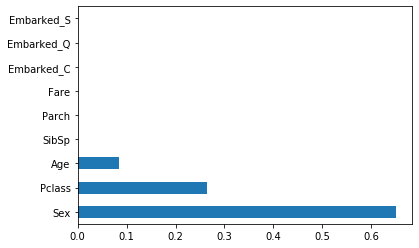

In [5]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

### Plotting a Decision Tree

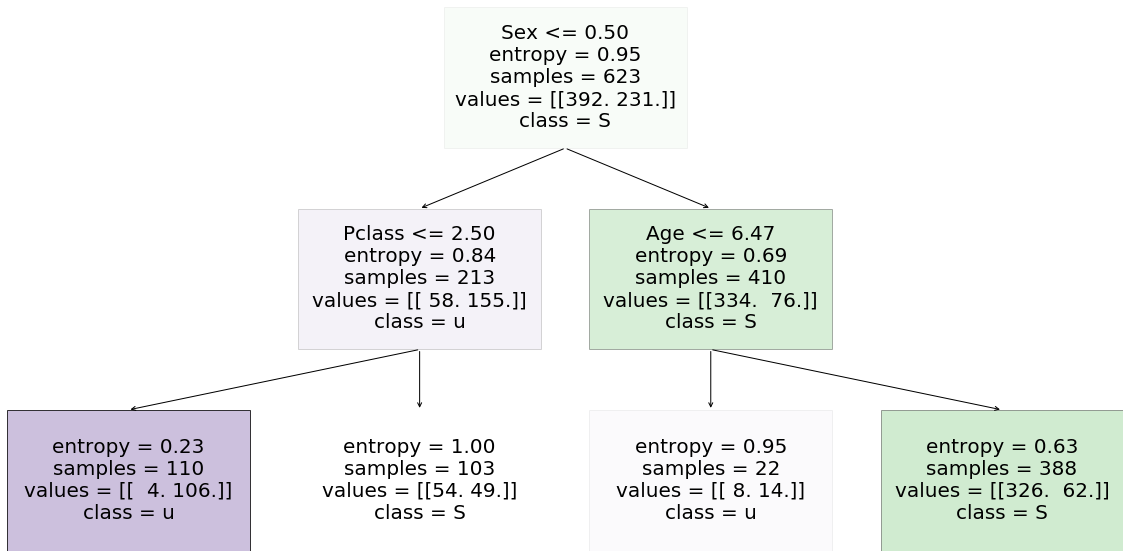

In [6]:
from dtreeplt import dtreeplt
import matplotlib.pyplot as plt

# Plotting the decision tree
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

# Get current figure and change its size
currentFigure=plt.gcf()
currentFigure.set_size_inches(20,10)